# Project Title: Zuber Analysis 

Introduction:
An anaylsis will be conducted for the company Zuber. Zuber is a new ride sharing company in Chicago. The aim is to support Zuber in having a successful launch in Chicago. Data is provided from competitors. An examination of passenger preferences and how external factors impact rides will be conducted. 

Purpose: The project will aim to answer the following questons: 
1. What patterns emerge about passenger preferneces? 
2. How do external factors impact rides? 

Hypothesis: The following hypothesis will be examined: 
a. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 

# Loading Libraries and Examining Data 

In [1]:
#Importing libraries
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
from scipy import stats as st 

In [2]:
#Importing data 
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_area = pd.read_csv('/datasets/project_sql_result_04.csv')
df_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
#Exploring dataframes 
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#Checking basic statistical info
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
#Checking for missing values 
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Description of data: The data types for each column are correct and there are no missing values as verfied by the .isna().sum() method. 

In [6]:
#Exploring dataframes 
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
#Checking basic statistical info
df_area.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
#Checking for missing values 
df_area.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Description of the data: The data types for each column are correct and there are no missing values as verfied by the .isna().sum() method. 

In [9]:
#Exploring dataframes 
df_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
df_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [11]:
#Checking for missing values 
df_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Description of the data: There are no missing values as verfied by the .isna().sum() method. The data types are correct for all columns. However, start_ts needs to be converted to datetime data type. 

# Data Preparation

In [12]:
# Convert start_ts to datetime data type 
df_ohare['start_ts'] = pd.to_datetime(df_ohare['start_ts'],format='%Y-%m-%d %H:%M:%S')

In [13]:
#Check change 
df_ohare.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Description: The data type has been converted to the appropriate one. 

# Data Exploration 

In [14]:
#ID top 10 neighborhoods for drop off 
display(df_area.sort_values(by = 'average_trips', ascending = False).head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [15]:
#Save as a variable for later use 
top_ten_neighborhoods = df_area.sort_values(by = 'average_trips', ascending = False).head(10)

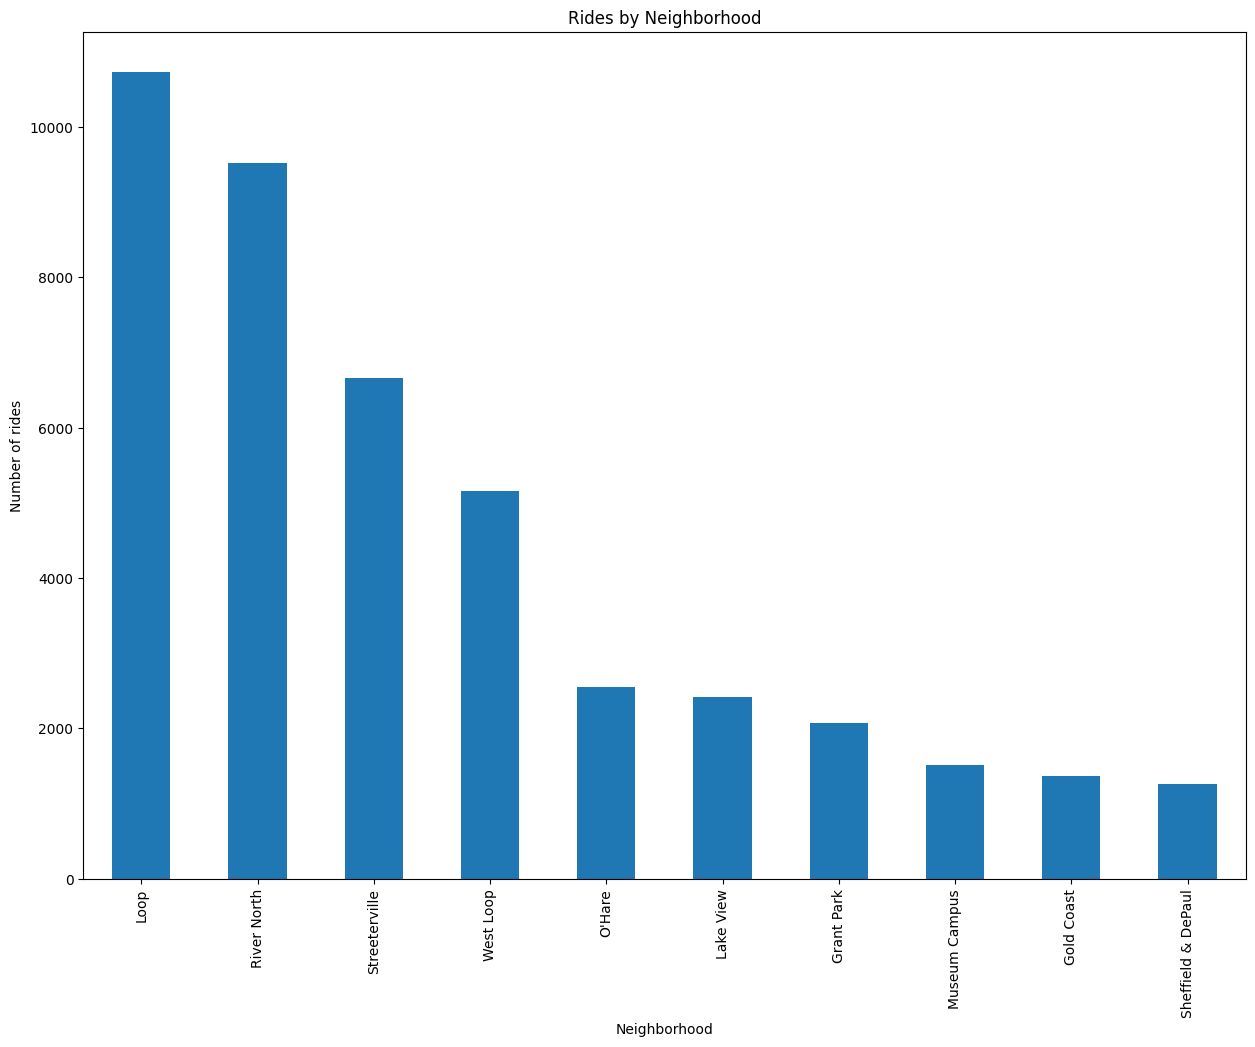

In [16]:
# Devise bar graph 
top_ten_neighborhoods.plot(kind='bar',
                          x = 'dropoff_location_name',
                          title = 'Rides by Neighborhood',
                          xlabel = 'Neighborhood',
                          ylabel = 'Number of rides',
                          figsize = [15,11],
                          legend = False
                          )
plt.show()

Conclusion: The Loop is the neighborhood that has the highest frequency of rides with nearly 11,000 rides. This is followed closely by the River North neighborhood. Zuber should focus on targeting these areas to ensure they genereate the most profit quickly. The other areas including the 3rd highest which is Streeterville is approximately 6,700 rides are considerably less than the Loop and River North neighborhoods. Therefore, it will be essential to make inroads in these 2 neighborhoods. 

In [17]:
#ID number of rides per taxi company 
display (df_company.sort_values(by = 'trips_amount', ascending = False).head(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [18]:
#Save as a variable for later use 
top_taxi_company = df_company.sort_values(by = 'trips_amount', ascending = False).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

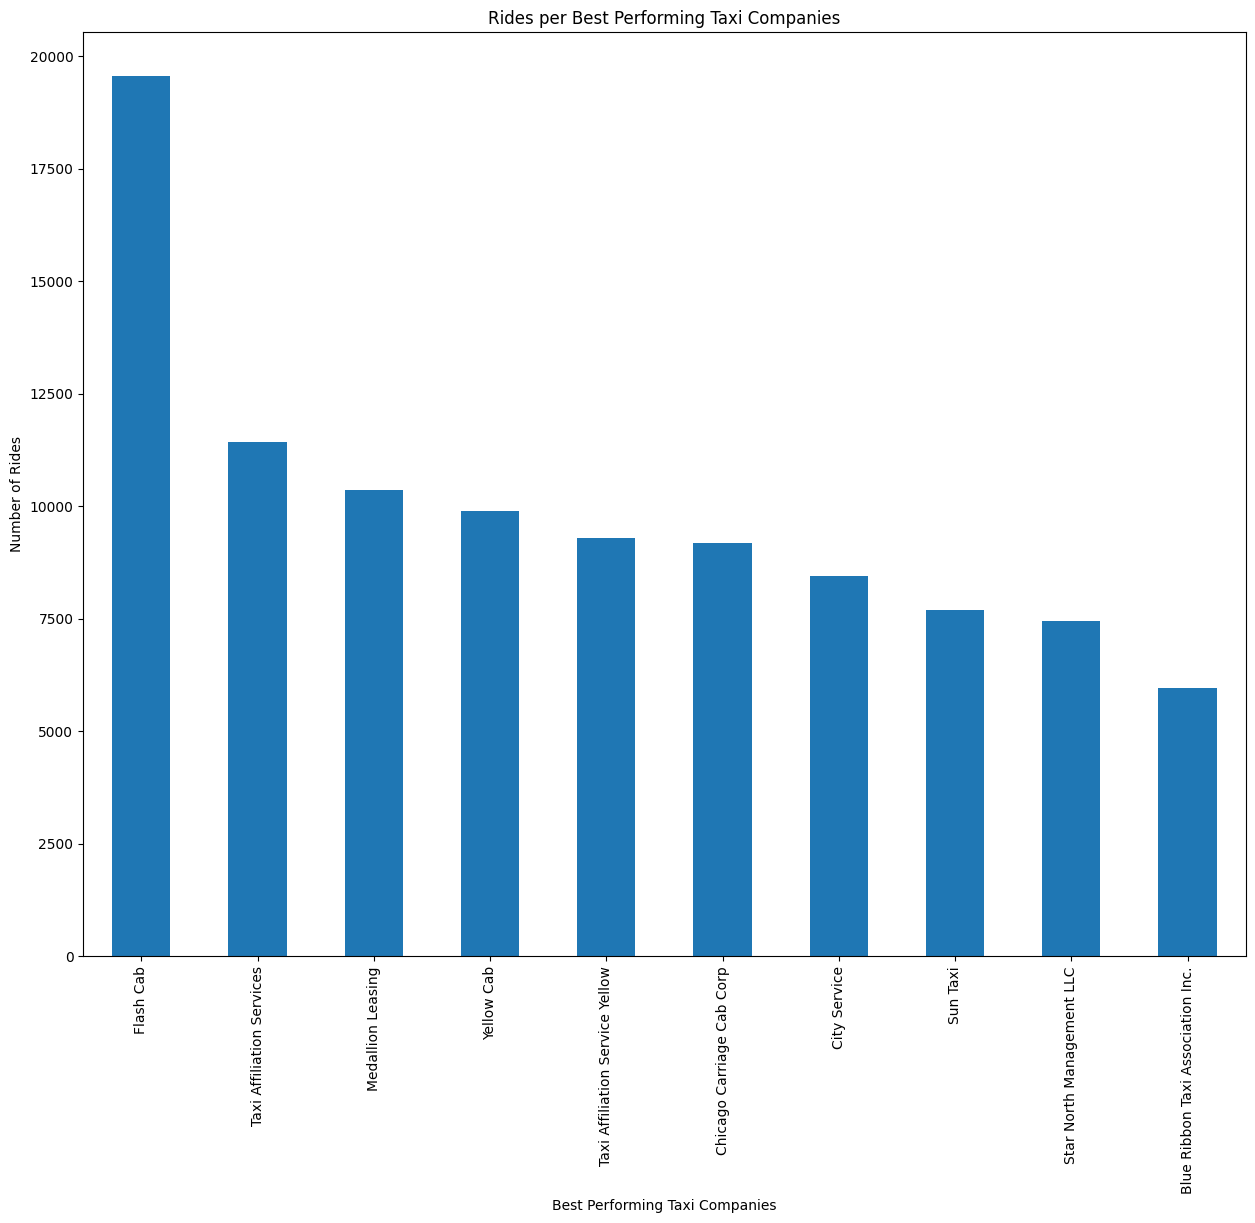

In [19]:
#Devise bar graph 
top_taxi_company.plot(kind='bar',
                     x='company_name',
                     stacked = True, 
                     title='Rides per Best Performing Taxi Companies',
                     xlabel='Best Performing Taxi Companies',
                     ylabel='Number of Rides',
                     figsize=[15,12],
                     legend=False
                     )
plt.show 

Conclusion: The leading taxi company in the area, Flash Cab, has nearly double the rides as it's nearest competitors. The nearest competitors Taxi Affiliation Services and Medallion Leasing are fairly comparable in the number of rides provided approximately 10,000 rides over the course of a year. This is approximately 27.5 rides a day. Zuber will need to aim to offer an average of 16.5 rides a day or approximately 6,000 rides over the course of the year to make it into the top ten companies. Once this goal has been met the focus can shift to out competing Flash Cab.  

# Statistical Analysis 

Description: The following hypothesis will be tested: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 
In order to examine these hypothesis it will be necessary to complete a two sample indenpedent t-test. It is common practice to a signficance level of 0.05, therefore that will be the signficance level used for this analysis. The aim will be to determine if the null hypothesis can be rejected or cannot be rejected. In statistics, the null hypothesis assumes that there is no difference between the groups being examined. Whereas the alternative hypothesis assumes that there is a difference between the groups being examined. 

In [20]:
# Examining weather conditions 
df_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [21]:
#Average duration of rides from the Loop to O'Hare 
#Filter data 
good_weather = df_ohare.query("weather_conditions =='Good'")[['duration_seconds']]
bad_weather = df_ohare.query("weather_conditions =='Bad'")[['duration_seconds']]

#Perform two sample t-test 
t_stat,p_value = st.ttest_ind(good_weather,bad_weather,equal_var=True)

#Interpretation 
alpha = 0.05 
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

if p_value < alpha: 
    print("Reject null hypothesis:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else: 
    print("Fail to reject the null hypothesis:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")

T-statistic:[-6.94617771]
P-value:[6.51797033e-12]
Reject null hypothesis:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


Conclusion: The statistical analysis demonstrates that the null hypothesis for "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays" can be rejected. This means the alternative hypothesis is then true and that a change occurs on rainy Saturdays. 

# General Conclusion 

Zuber will need to focus on the neighborhoods that generate the most business opportunities which will be the Loop and River North neighborhoods. Zuber will need to develop their business by offering at least 6,000 rides a year and 16.5 rides on average a day to compete with the other companies. It will be necessary to take into account the external factor of weather. Additional examination of other external factors should be examined after the 1st year of business. For example, it would be privotal to determine how to make rides more accessible to better generate more clientel. Moreover, it would be helpful to determine more specifically how weather may impact business, so either more or less rides would be available for clientel. Finally, it is likely to compete with Flash Cab it will be necessary to take these into account in order to adequetly exand.  